We are going to build a SVM to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English
alphabets.
The character images were based on 20 different fonts and each letter within these 20 fonts was
randomly distorted to produce a file of 20,000 unique stimuli.

Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from O through 15.

###### We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string

%matplotlib inline

In [2]:
df = pd.read_csv('letterdata.csv')

In [3]:
df.head(10)    #first 10 rows/ records

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [4]:
df.shape

(20000, 17)

# Spillitn the Data

In [5]:
X = np.array(df)[:,1:16]

X is the selecting all rows that's why we used " : "  , & columns from 1-16  that's why we used ,  " 1:16 "

In [6]:
y = np.array(df.letter)[:] 

y is selecting only all values of 'letter column'

## Manually creating data set for algoriothm

In [9]:
X_train = X[0:16000, 0:17]  # selecting rows upto 16000 & all of it's column values
X_test  = X[16001: , :]     # selecting rows after 16000 & all columns
y_train = y[:16000]  # selecting all row values upto 16000 in letter column index
y_test  = y[16001:]  # selecting all row value in "letter" column after 16000 row

In [12]:
len(y_train)

16000

In [14]:
len(X_train)

16000

# Build SVM Model

In [18]:
from sklearn import svm

model = svm.SVC(C = 3)      # svm = Support Vector Machine  &  SVC = Support Vector Classisfier  &  C = penalty  

C is penalty of wrong classifications. It tells the algorithm how much you care about misclassified points. A high value for C tells the algorithml that you care more about classifying all of the trainig points correctly.

 for more details visit : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [20]:
model.fit(X_train,y_train)

SVC(C=3)

In [21]:
# let's make some predictions 
y_pred = model.predict(X_test)

In [22]:
y_pred

array(['N', 'V', 'I', ..., 'T', 'S', 'A'], dtype=object)

In [23]:
# see accuracy of the test data set

model.score(X_test,y_test)

0.927231807951988

###### Now let us create a comparision among the   y( test & prediction ) so that we can see the arrangement 

In [24]:
y_grid = np.column_stack([y_test,y_pred])

In [27]:
y_grid

array([['N', 'N'],
       ['V', 'V'],
       ['I', 'I'],
       ...,
       ['T', 'T'],
       ['S', 'S'],
       ['A', 'A']], dtype=object)

most of them looks perfect pair because we got model.score = 92%

In [37]:
import string

lab = list(string.ascii_uppercase[0:26]) # creating upper case letters from   A - Z
plab = ['Predicted ' + i for i in lab ]   # just gonna add predicted in front of all letters

In [38]:
print(lab)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [39]:
print(plab)

['Predicted A', 'Predicted B', 'Predicted C', 'Predicted D', 'Predicted E', 'Predicted F', 'Predicted G', 'Predicted H', 'Predicted I', 'Predicted J', 'Predicted K', 'Predicted L', 'Predicted M', 'Predicted N', 'Predicted O', 'Predicted P', 'Predicted Q', 'Predicted R', 'Predicted S', 'Predicted T', 'Predicted U', 'Predicted V', 'Predicted W', 'Predicted X', 'Predicted Y', 'Predicted Z']


#### let us use confusion matrix to find out the missing (or) misposotioned values

In [41]:
from sklearn import metrics

<AxesSubplot:>

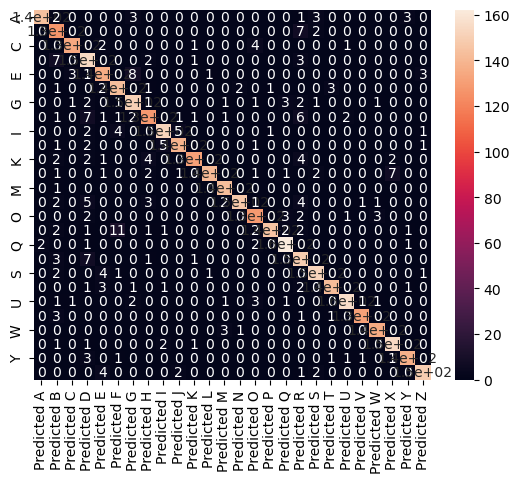

In [43]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = lab )
df_cm = pd.DataFrame(cm, index = [ i for i in lab],
                    columns = [ i for i in plab])

sns.heatmap(df_cm,annot=True)

<AxesSubplot:>

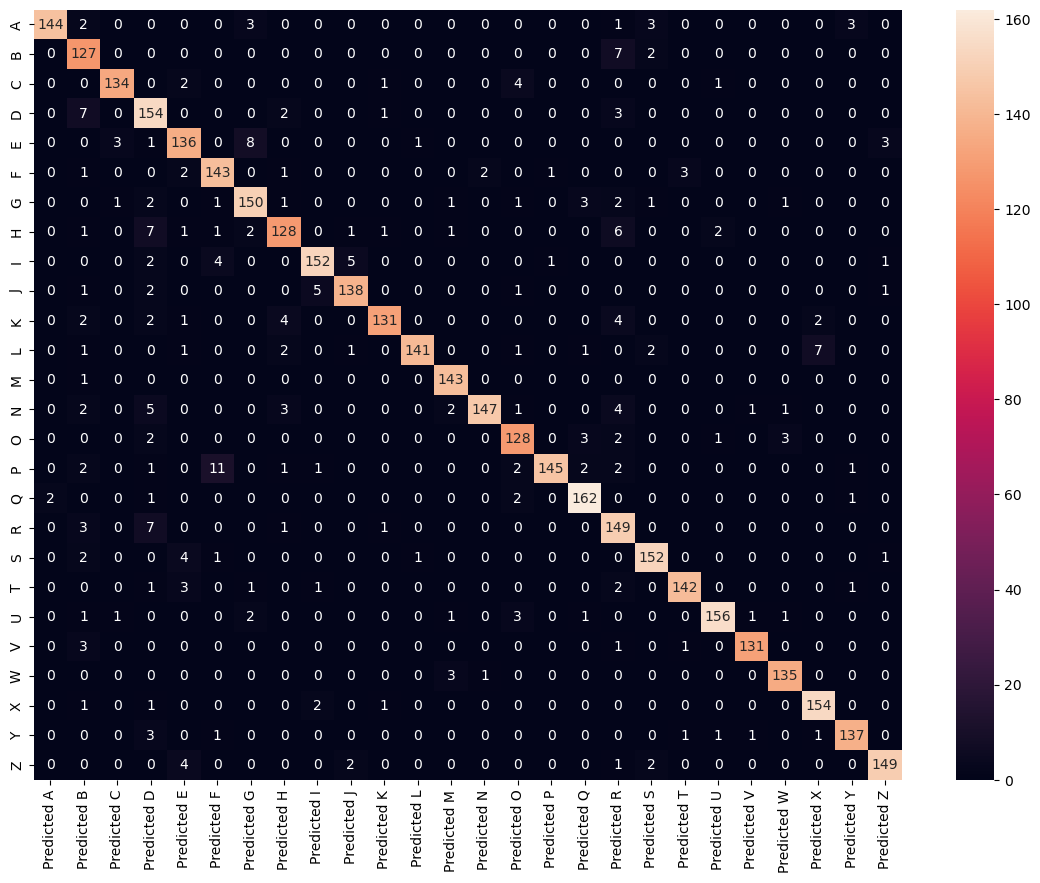

In [50]:
plt.figure(figsize=(14,10))
sns.heatmap(df_cm,annot=True, fmt = 'g'  )

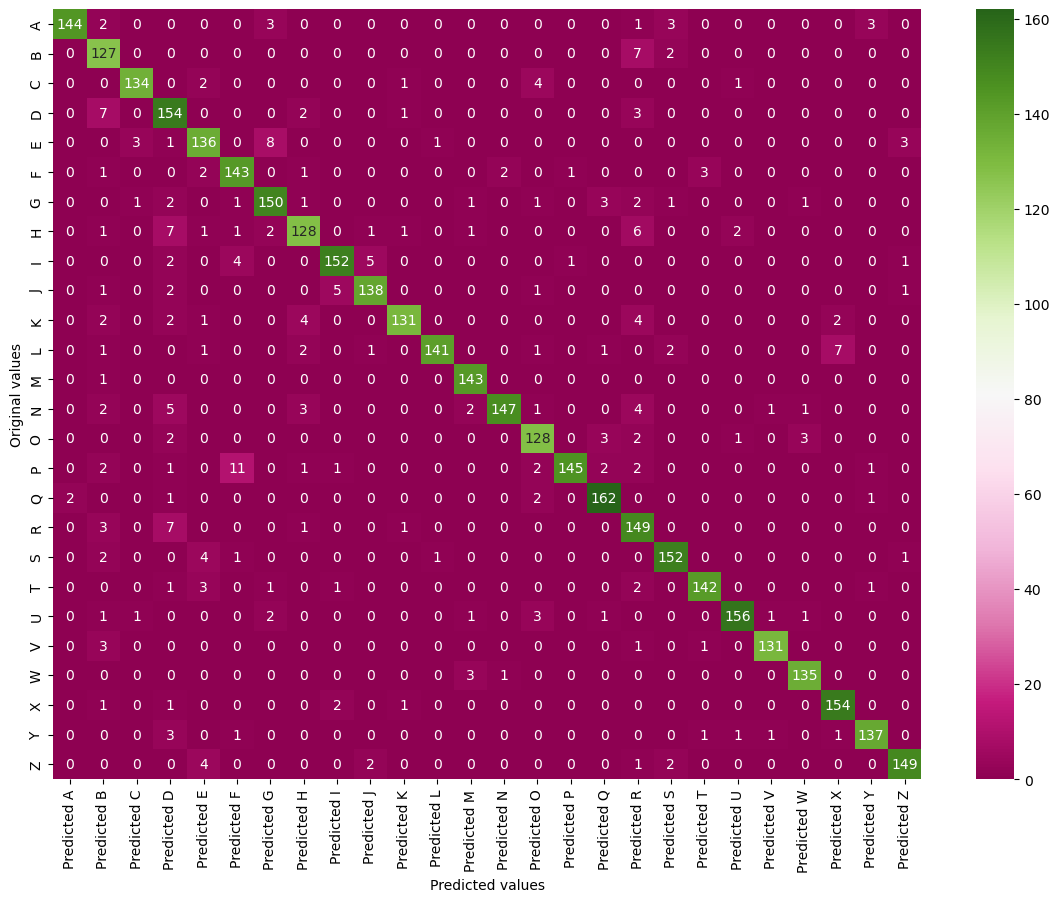

In [56]:
plt.figure(figsize=(14,10))
sns.heatmap(df_cm,annot=True, fmt = 'g' , cmap = 'PiYG' )
plt.ylabel('Original values')
plt.xlabel('Predicted values')
plt.show()

for example here in 'P' it  predicted 11 values of P as f 

In [ ]:
# hey i'm done here if you want you can do eda exploratory data analysis via logistical & linear regrressions 